<a href="https://colab.research.google.com/github/ashishg9453/ml_assignment_2/blob/main/2025AA05576_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ML Assignment 2 - BITS Pilani
# End-to-End Classification Workflow

!pip install streamlit scikit-learn xgboost matplotlib seaborn pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [2]:
# Step 1: Dataset choice (Breast Cancer dataset from sklearn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target distribution:", y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Dataset shape: (569, 30)
Target distribution: 1    357
0    212
Name: count, dtype: int64


In [3]:
# Step 2: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Train & Evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob[:,1])
    except:
        auc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    results.append([name, acc, auc, prec, rec, f1, mcc])

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


kNN Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg   

In [4]:
# Results Table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC", "Precision", "Recall", "F1", "MCC"])
print("\nComparison Table:\n")
print(results_df)


Comparison Table:

                 Model  Accuracy       AUC  Precision    Recall        F1  \
0  Logistic Regression  0.973684  0.997380   0.972222  0.985915  0.979021   
1        Decision Tree  0.938596  0.936947   0.957143  0.943662  0.950355   
2                  kNN  0.947368  0.981985   0.957746  0.957746  0.957746   
3          Naive Bayes  0.964912  0.997380   0.958904  0.985915  0.972222   
4        Random Forest  0.964912  0.996725   0.958904  0.985915  0.972222   
5              XGBoost  0.956140  0.990829   0.958333  0.971831  0.965035   

        MCC  
0  0.943898  
1  0.870056  
2  0.887979  
3  0.925285  
4  0.925285  
5  0.906379  


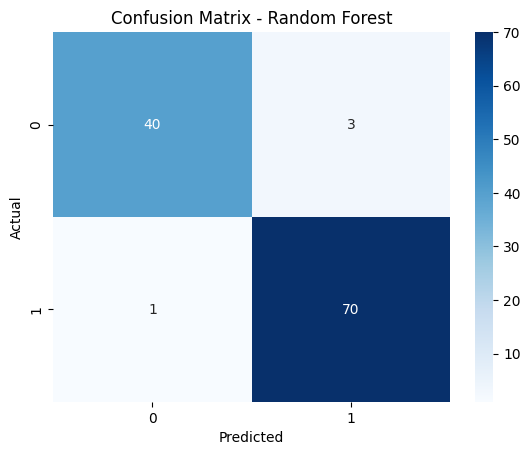

In [5]:
# Confusion Matrix Example (Random Forest)
cm = confusion_matrix(y_test, models["Random Forest"].predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
import joblib

# Save each trained model into the 'model' folder
joblib.dump(models["Logistic Regression"], "logistic_regression.pkl")
joblib.dump(models["Decision Tree"], "decision_tree.pkl")
joblib.dump(models["kNN"], "knn.pkl")
joblib.dump(models["Naive Bayes"], "naive_bayes.pkl")
joblib.dump(models["Random Forest"], "random_forest.pkl")
joblib.dump(models["XGBoost"], "xgboost.pkl")

['xgboost.pkl']